# Muestreo y Cuantización en Procesamiento de Imágenes

El procesamiento digital de imágenes se basa en dos operaciones fundamentales:

* Muestreo espacial: Convertir una imagen continua en una matriz discreta de píxeles

* Cuantización: Asignar valores discretos a la intensidad de cada píxel

In [ ]:
# Preparación del entorno

import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

Estas bibliotecas son fundamentales:

* NumPy: Permite trabajar con matrices (que es como se representan las imágenes)
* OpenCV (cv2): Biblioteca especializada en procesamiento de imágenes
* Matplotlib: Nos permite visualizar las imágenes y gráficos

In [ ]:
# Descargamos las imágenes de ejemplo
!wget https://cdn.pixabay.com/photo/2018/06/19/15/04/new-3484604_1280.jpg
!wget https://sipi.usc.edu/database/preview/misc/gray21.512.png
!wget https://www.dropbox.com/s/vjxcddg5rgap35i/scale.png

--2025-04-22 23:20:12--  https://cdn.pixabay.com/photo/2018/06/19/15/04/new-3484604_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.147.160, 104.18.40.96, 2606:4700:4400::ac40:93a0, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.147.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 303991 (297K) [image/jpeg]
Saving to: ‘new-3484604_1280.jpg.1’

new-3484604_1280.jp 100%[===================>] 296.87K  --.-KB/s    in 0.05s   

2025-04-22 23:20:13 (6.35 MB/s) - ‘new-3484604_1280.jpg.1’ saved [303991/303991]

--2025-04-22 23:20:13--  https://sipi.usc.edu/database/preview/misc/gray21.512.png
Resolving sipi.usc.edu (sipi.usc.edu)... 68.181.2.90
Connecting to sipi.usc.edu (sipi.usc.edu)|68.181.2.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 800 [image/png]
Saving to: ‘gray21.512.png.3’

gray21.512.png.3    100%[===================>]     800  --.-KB/s    in 0s      

2025-04-22 23:20:13 (80.3 MB/s) - ‘gray21.5

## Visualización y análisis de la imagen original

In [ ]:
# Muestra información básica de la imagen
def howis(img):
    print('Tamaño =', img.shape)     # Dimensiones de la matriz
    print('Máximo =', np.max(img))   # Valor más alto (más blanco)
    print('Mínimo =', np.min(img))   # Valor más bajo (más negro)

In [ ]:
# 3. CARGA Y VISUALIZACIÓN DE IMAGEN ORIGINAL
X = imread('new-3484604_1280.jpg')    # Lee la imagen del archivo
X = X[:,:,0]               # Toma solo el primer canal (rojo)
                          # Los : significan "todos los elementos"

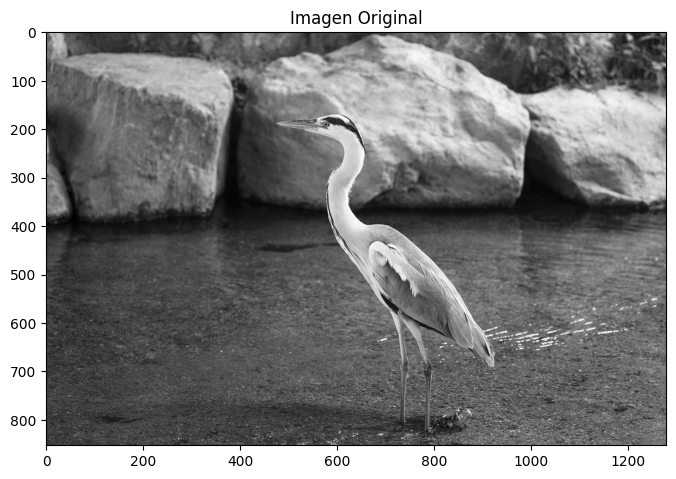

Tamaño = (853, 1280)
Máximo = 255
Mínimo = 0


In [ ]:
# Muestra la imagen original
plt.figure(figsize=(8,8))   # Crea figura de 8x8 pulgadas
plt.imshow(X, cmap='gray')  # Muestra imagen en escala de grises
plt.title('Imagen Original')
plt.show()                  # Muestra la figura
howis(X)                    # Muestra información

## Muestreo Espacial

El muestreo espacial reduce la resolución de una imagen tomando píxeles a intervalos regulares.

In [ ]:
d = 2   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Nx,Mx) = X.shape          # Obtiene dimensiones de imagen original
ix = range(0,Nx,d)         # Crea secuencia de 0 a Nx saltando de d en d
jx = range(0,Mx,d)         # Igual para columnas
Ny = len(ix)               # Nueva altura = número de filas a tomar
My = len(jx)               # Nueva anchura = número de columnas a tomar

In [ ]:
# Crea nueva imagen muestreada
Y = np.zeros((Ny,My), np.uint8)  # Matriz vacía de enteros 0-255
for i in range(Ny):              # Para cada fila
    for j in range(My):          # Para cada columna
        Y[i,j] = X[ix[i],jx[j]]  # Copia el pixel correspondiente

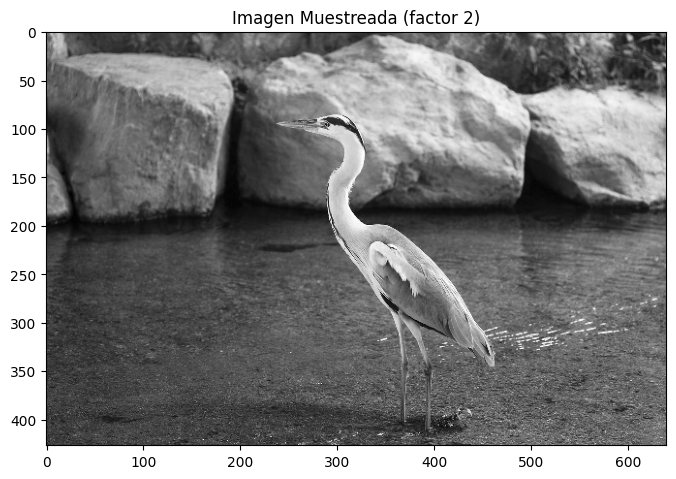

Tamaño = (427, 640)
Máximo = 255
Mínimo = 0
Resolución reducida de 853x1280 a 427x640 pixels


In [ ]:
# Muestra imagen muestreada
plt.figure(figsize=(8,8))
plt.imshow(Y, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.show()
howis(Y)
print(f'Resolución reducida de {Nx}x{Mx} a {Ny}x{My} pixels')

## Cuantizacion

La cuantización reduce el número de niveles de gris en la imagen.

In [ ]:
q = 32                  # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
Z = np.floor(X/q)*q      # Agrupa valores en intervalos de tamaño q
Z = Z.astype(np.uint8)   # Convierte a enteros 0-255

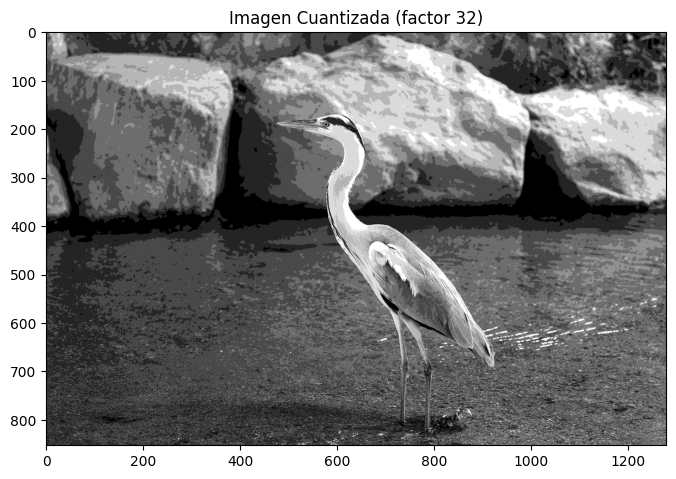

Tamaño = (853, 1280)
Máximo = 224
Mínimo = 0
Esta imagen tiene 8 niveles de gris (original: 256)


In [ ]:
# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(Z, cmap='gray')
plt.title(f'Imagen Cuantizada (factor {q})')
plt.show()
howis(Z)
print(f'Esta imagen tiene {int(256/q)} niveles de gris (original: 256)')

## Histograma de la imagen

El histograma muestra la distribución de los niveles de gris en la imagen.

In [ ]:
def hist(img):
    h = np.zeros(256)           # Vector para contar ocurrencias
    for i in range(img.shape[0]):    # Para cada fila
        for j in range(img.shape[1]): # Para cada columna
            h[img[i,j]] += 1         # Incrementa contador del valor
    return h

VISUALIZACIÓN DE HISTOGRAMAS

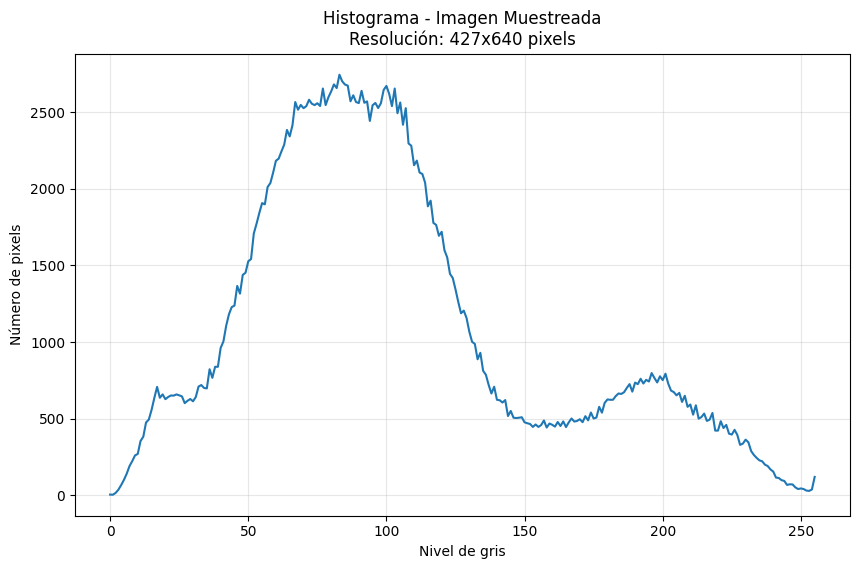

In [ ]:
# Histograma imagen muestreada
plt.figure(figsize=(10,6))
plt.plot(hist(Y))
plt.title(f'Histograma - Imagen Muestreada\nResolución: {Ny}x{My} pixels')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

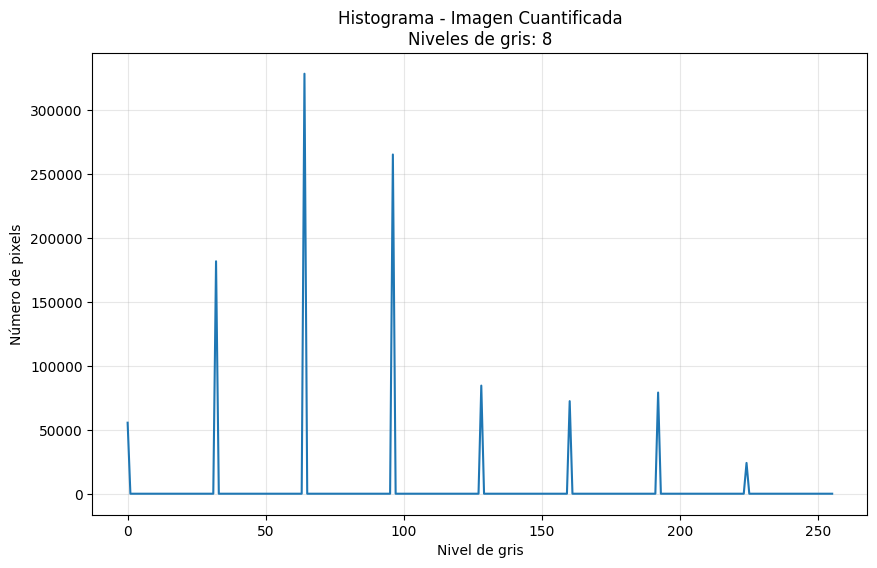

In [ ]:
# Histograma imagen cuantizada
plt.figure(figsize=(10,6))
plt.plot(hist(Z))
plt.title(f'Histograma - Imagen Cuantificada\nNiveles de gris: {int(256/q)}')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

### Conceptos clave para reforzar

* Resolución espacial: Número de píxeles en la imagen (afectado por el muestreo)
* Profundidad de bits: Número de niveles de gris posibles (afectado por la cuantización)
* Aliasing: Efecto no deseado que aparece cuando el muestreo es insuficiente
* Posterización: Efecto visual que ocurre cuando hay pocos niveles de gris (cuantización grande)

## Ejercicios prácticos

Exploración básica: Cambiar entre las imágenes disponibles (mandril.png y scale.png) modificando la variable nombre_imagen y observar las diferencias en los resultados.

Efectos del muestreo: Experimentar con diferentes valores del factor_muestreo (2, 4, 8, etc.) y analizar:

* ¿Cómo afecta a la calidad visual de la imagen?
* ¿Cuánto se reduce el tamaño de la imagen con cada factor?
* ¿A partir de qué factor se hace notoria la pérdida de calidad?


Efectos de la cuantización: Probar con diferentes valores del factor_cuantizacion (32, 64, 128) y observar:

* ¿Cómo cambia la apariencia de la imagen?
* ¿Qué sucede con el histograma en cada caso?
* ¿En qué tipos de imágenes es más o menos notorio el efecto?

Reto de comprensión:

* ¿Qué ocurre si combinamos muestreo y cuantización en una misma imagen?
* ¿Qué proceso afecta más a la calidad percibida de la imagen?
* ¿Qué proceso permite mayor compresión de datos?